In [28]:
import pandas as pd
import numpy as np

In [29]:
#Idioms
#if-then
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [30]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [31]:
df.loc[df.AAA >= 5, "BBB"] = -1


In [32]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [33]:
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555


In [34]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [36]:
df.loc[df.AAA < 5, ["BBB", "CCC"]] = 2000

In [35]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [37]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [38]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


In [39]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [40]:
df["logic"] = np.where(df["AAA"] > 5, "high", "low")

In [41]:
df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


In [42]:
#Splitting
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df[df.AAA <= 5]
df[df.AAA > 5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


In [ ]:
#Building criteria

df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


In [43]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [44]:
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [45]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [46]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 999

In [47]:
df

,AAA,BBB,CCC
0,999,10,100
1,5,20,50
2,999,30,-30
3,999,40,-50


In [48]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
aValue = 43.0
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [49]:
aValue = 43.0
df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [50]:
#Selection Dataframes
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
Crit1 = df.AAA <= 5.5

Crit2 = df.BBB == 10.0

Crit3 = df.CCC > -40.0


In [ ]:
df

In [52]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)


In [53]:
df.loc["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [54]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

In [55]:
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])

In [57]:
df2.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [59]:
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [63]:
#New Columns
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})
df



,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [65]:
source_cols = df.columns  # Or some subset would work too

new_cols = [str(x) + "_cat" for x in source_cols]

categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}

df


,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [66]:
#method 1
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
3,3,2,1


In [67]:
#method 2
df.sort_values(by="BBB").groupby("AAA", as_index=False)

In [68]:
#Multiindexing

In [69]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)


In [70]:
#Arithmetic
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)
df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)
df

A                   B                   C          
          O         I         O         I         O         I
n  1.010731 -1.230772  2.228348  0.904560  0.139424  0.370957
m  0.954326  1.413365 -0.326655 -0.285814  0.973561  1.481629

In [71]:
df = df.div(df["C"], level=1)
df

A                    B              C     
          O         I          O         I    O    I
n  7.249347 -3.317827  15.982566  2.438449  1.0  1.0
m  0.980243  0.953926  -0.335526 -0.192905  1.0  1.0

In [72]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

index = pd.MultiIndex.from_tuples(coords)

df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])

df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [73]:
 #level and axis are optional, and default to zero
df.xs("BB", level=0, axis=0)
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


In [74]:
#Sliicing MultiIndex with xs

In [75]:
import itertools

index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

df = pd.DataFrame(data, indx, cols)

df

All = slice(None)

df.loc["Violet"]

df.loc[(All, "Math"), All]


df.loc[(slice("Ada", "Quinn"), "Math"), All]


df.loc[(All, "Math"), ("Exams")]

df.loc[(All, "Math"), (All, "II")]


,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


In [76]:
#Sorting
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

In [77]:
#Missing Data
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)
df.loc[df.index[3], "A"] = np.nan
df
df.bfill()



,A
2013-08-01,0.991383
2013-08-02,1.464694
2013-08-05,0.217946
2013-08-06,-1.133269
2013-08-07,-1.133269
2013-08-08,-1.803030


In [79]:
#Grouping
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)
df


,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [81]:
#Merge
rng = pd.date_range("2000-01-01", periods=6)

df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])

df2 = df1.copy()

In [82]:
df = pd.concat([df1, df2], ignore_index=True)

df

,A,B,C
0,-0.284685,0.170120,-0.069750
1,0.709793,0.458655,0.653466
2,0.086022,-1.199475,1.215782
3,0.642437,1.493989,0.322629
4,-0.168725,0.339555,1.414199
5,0.182173,0.043828,-1.189809
6,-0.284685,0.170120,-0.069750
7,0.709793,0.458655,0.653466
8,0.086022,-1.199475,1.215782
9,0.642437,1.493989,0.322629


In [83]:
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)


df

,Area,Bins,Test_0,Data
0,A,110,0,-1.256768
1,A,110,1,2.021126
2,A,160,0,0.208465
3,A,160,1,0.509676
4,A,160,2,0.065049
5,C,40,0,1.946436
6,C,40,1,-0.171889


In [84]:
df["Test_1"] = df["Test_0"] - 1

pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,-1.256768,-1,1,2.021126,0
1,A,160,0,0.208465,-1,1,0.509676,0
2,A,160,1,0.509676,0,2,0.065049,1
3,C,40,0,1.946436,-1,1,-0.171889,0


<Axes: title={'center': 'price'}, xlabel='quartiles'>

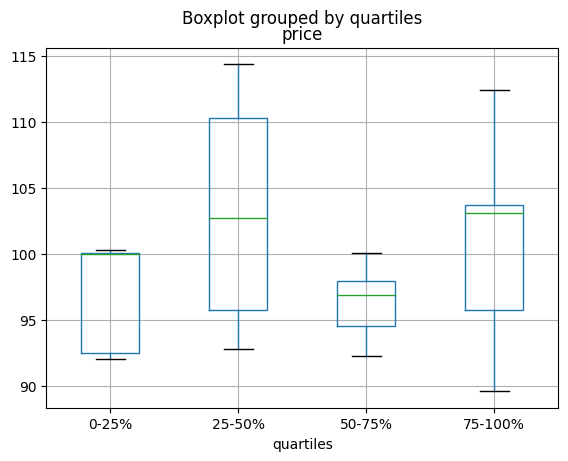

In [85]:
#Plotting
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)


df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)


df.boxplot(column="price", by="quartiles")


In [87]:
#Muitos Arquivos em um único dataframe
#pd.concat()
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))


files = ["file_0.csv", "file_1.csv", "file_2.csv"]

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)


In [88]:
import glob

import os

files = glob.glob("file_*.csv")

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [89]:
#Passing date componets in multi-columns
i = pd.date_range("20000101", periods=10000)

df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})

df.head()
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')
ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)
ds.head()
%timeit pd.to_datetime(ds)

5.95 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.3 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
